## Data dictionary:
- **Title:** title of the reddit post
- **Upvote_ratio:** the percentage of upvotes from all votes on thread comment is on
- **Score:** number of upvotes on the comment
- **Gilded:** the number of gilded tags (premium likes) on the comment
- **Over_18:** Whether or not the thread has been marked as NSFW
- **Number_of_comments:** Number of comments

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
final = pd.read_csv('reddit_final.csv')
final.head()

,Title,Upvote_ratio,Score,Gilded,Over_18,Number_of_Comments,character_count,word_count,Subjectivity,Polarity,neg,neu,pos,compound
0,House impeaches Trump for second time over Cap...,0.72,39464,2,False,8801,56,9,0.000000,0.000000,0.292,0.708,0.000,-0.5106
1,I'm a 16 yr old blacksmith and I forged this w...,0.90,29423,0,False,443,85,18,0.200000,0.100000,0.000,0.735,0.265,0.6597
2,Do some research before spouting nonsense,0.90,50420,0,False,1008,41,6,0.000000,0.000000,0.351,0.649,0.000,-0.4019
3,Moving boxes arrive at the White House,0.81,149858,6,False,4392,38,7,0.000000,0.000000,0.000,1.000,0.000,0.0000
4,No One Took Us Seriously Black Cops Warned Ab...,0.98,7768,0,False,157,92,15,0.433333,-0.166667,0.476,0.524,0.000,-0.8402


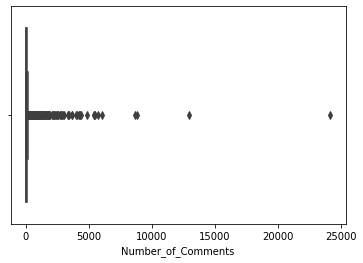

In [3]:
sns.boxplot(final['Number_of_Comments'])

In [4]:
final[final['Number_of_Comments'] >= 7000]

,Title,Upvote_ratio,Score,Gilded,Over_18,Number_of_Comments,character_count,word_count,Subjectivity,Polarity,neg,neu,pos,compound
0,House impeaches Trump for second time over Cap...,0.72,39464,2,False,8801,56,9,0.0,0.00,0.292,0.708,0.000,-0.5106
4170,What is the most obvious lie you have ever bee...,0.91,64969,1,False,24155,53,11,0.5,0.25,0.000,1.000,0.000,0.0000
4483,Donald Trump impeached for inciting US Capitol...,0.76,169633,10,False,12950,53,8,0.0,0.00,0.340,0.660,0.000,-0.5574
4875,EA will no longer have exclusive rights of the...,0.93,166637,2,False,8639,62,12,0.0,0.00,0.356,0.552,0.092,-0.6486


**Number of comments has outliers - But we don't remove it since we want to generalize it for other posts**

In [5]:
#Checking the repeated columns
final[final.duplicated()]

,Title,Upvote_ratio,Score,Gilded,Over_18,Number_of_Comments,character_count,word_count,Subjectivity,Polarity,neg,neu,pos,compound


In [6]:
final.shape

(7469, 14)

In [7]:
final.columns

Index(['Title', 'Upvote_ratio', 'Score', 'Gilded', 'Over_18',
       'Number_of_Comments', 'character_count', 'word_count', 'Subjectivity',
       'Polarity', 'neg', 'neu', 'pos', 'compound'],
      dtype='object')

## Title column cleaning for NLP Operations

In [8]:
# data preprocessing
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def text_preprocess(text):
    text = re.sub(r'[^\w\s]', '', text) 
    l_text = [word for word in text.lower().split() if word not in ENGLISH_STOP_WORDS]
    stem_words = [stemmer.stem(w) for w in l_text]
    lemma_words = [lemmatizer.lemmatize(w) for w in l_text]

    return " ".join(lemma_words)

final['Title'] = final['Title'].map(lambda x : text_preprocess(x))

In [9]:
final.head()

,Title,Upvote_ratio,Score,Gilded,Over_18,Number_of_Comments,character_count,word_count,Subjectivity,Polarity,neg,neu,pos,compound
0,house impeaches trump second time capitol riot,0.72,39464,2,False,8801,56,9,0.000000,0.000000,0.292,0.708,0.000,-0.5106
1,im 16 yr old blacksmith forged whale bottle op...,0.90,29423,0,False,443,85,18,0.200000,0.100000,0.000,0.735,0.265,0.6597
2,research spouting nonsense,0.90,50420,0,False,1008,41,6,0.000000,0.000000,0.351,0.649,0.000,-0.4019
3,moving box arrive white house,0.81,149858,6,False,4392,38,7,0.000000,0.000000,0.000,1.000,0.000,0.0000
4,took seriously black cop warned racist capitol...,0.98,7768,0,False,157,92,15,0.433333,-0.166667,0.476,0.524,0.000,-0.8402


In [10]:
final.columns

Index(['Title', 'Upvote_ratio', 'Score', 'Gilded', 'Over_18',
       'Number_of_Comments', 'character_count', 'word_count', 'Subjectivity',
       'Polarity', 'neg', 'neu', 'pos', 'compound'],
      dtype='object')

In [11]:
#Drop unnecessary columns

final.drop('character_count', axis = 1, inplace = True)

## OneHotEncoding the over_18 column

In [12]:
#Over_18 encoding
#Getting dumm variables
dummies = pd.get_dummies(final['Over_18'])
final = pd.concat([final,dummies], axis = 'columns')
#dropping Over_18 column and a dummy variable to avoid the dummy variable trap
final.drop(['Over_18',True], axis = 'columns', inplace = True)

In [13]:
final.head()

,Title,Upvote_ratio,Score,Gilded,Number_of_Comments,word_count,Subjectivity,Polarity,neg,neu,pos,compound,False
0,house impeaches trump second time capitol riot,0.72,39464,2,8801,9,0.000000,0.000000,0.292,0.708,0.000,-0.5106,1
1,im 16 yr old blacksmith forged whale bottle op...,0.90,29423,0,443,18,0.200000,0.100000,0.000,0.735,0.265,0.6597,1
2,research spouting nonsense,0.90,50420,0,1008,6,0.000000,0.000000,0.351,0.649,0.000,-0.4019,1
3,moving box arrive white house,0.81,149858,6,4392,7,0.000000,0.000000,0.000,1.000,0.000,0.0000,1
4,took seriously black cop warned racist capitol...,0.98,7768,0,157,15,0.433333,-0.166667,0.476,0.524,0.000,-0.8402,1


## Splitting data into test and validation sets

In [14]:
X = final.drop(['Score'], axis = 1)
y = final.Score

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13)

## Converting 'Title' column to vector

In [16]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train['Title'])

Using TensorFlow backend.


In [17]:
word_ind = tokenizer.word_index
word_token = {k:[word_ind[k]] for k in word_ind}
df_word_token = pd.DataFrame(word_token)
df_word_token.to_csv('word_token.csv', header=True, index=False)

In [18]:
glove_txt = open('glove.6B.100d.txt', encoding="utf8")
embed_dict = dict()
for line in glove_txt:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embed_dict[word] = vector_dimensions
glove_txt.close()

embed_mat = np.zeros((len(word_ind) + 1, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embed_dict.get(word)
    if embedding_vector is not None:
        embed_mat[index] = embedding_vector

In [19]:
embedded_matrix = pd.DataFrame(data=embed_mat.astype(float))
embedded_matrix.to_csv('embedded.csv', sep = ' ', header =True, float_format='%.2f', index=False)

## Using GloVe vectors to assign vector value for title

In [20]:
from keras.preprocessing.sequence import pad_sequences
max_len = 300
## train data
train_body = pad_sequences(tokenizer.texts_to_sequences(X_train["Title"]), padding='post', maxlen=max_len)
train = {}
df_train_body = []
for i, sentence in enumerate(train_body):
    vectors = []
    for n in sentence:
        vectors.append(embed_mat[n])
    train[i] = vectors
for key in train:
    arr = np.array(train[key])
    df_train_body.append(np.mean(arr, axis=0))

In [21]:
## test data
test_body = pad_sequences(tokenizer.texts_to_sequences(X_test["Title"]), padding='post', maxlen=max_len)
test = {}
df_test_body = []
for i, sentence in enumerate(test_body):
    vectors = []
    for n in sentence:
        vectors.append(embed_mat[n])
    test[i] = vectors
for key in test:
    arr = np.array(test[key])
    df_test_body.append(np.mean(arr, axis=0))

In [22]:
df_train_body = pd.DataFrame(np.array(df_train_body))
df_test_body = pd.DataFrame(np.array(df_test_body))

In [23]:
df_train_body.shape

(5975, 100)

In [24]:
X_train.columns

Index([             'Title',       'Upvote_ratio',             'Gilded',
       'Number_of_Comments',         'word_count',       'Subjectivity',
                 'Polarity',                'neg',                'neu',
                      'pos',           'compound',                False],
      dtype='object')

In [25]:
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)

In [26]:
X_train = pd.concat([X_train, df_train_body], axis=1)
X_test =  pd.concat([X_test, df_test_body], axis=1)

In [27]:
X_train.shape, X_test.shape

((5975, 112), (1494, 112))

In [28]:
X_train.drop('Title', axis =1, inplace = True)
X_test.drop('Title', axis =1, inplace = True)

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Columns: 111 entries, Upvote_ratio to 99
dtypes: float64(107), int64(3), uint8(1)
memory usage: 5.0 MB


In [30]:
import numpy.ma as ma
np.where(np.isnan(X_train), ma.array(X_train, mask=np.isnan(X_train)).mean(axis=0), X_train)  
np.where(np.isnan(X_test), ma.array(X_test, mask=np.isnan(X_test)).mean(axis=0), X_test)

array([[ 9.50000000e-01,  0.00000000e+00,  7.80000000e+02, ...,
        -1.25810668e-02,  1.05726368e-02,  1.66236628e-04],
       [ 9.90000000e-01,  0.00000000e+00,  8.70000000e+01, ...,
         1.73810005e-03, -9.63133375e-04,  3.83299987e-03],
       [ 1.00000000e+00,  0.00000000e+00,  1.70000000e+01, ...,
        -1.67303324e-03,  3.95733342e-04,  2.91196664e-03],
       ...,
       [ 9.70000000e-01,  0.00000000e+00,  4.82000000e+02, ...,
        -6.67433292e-04,  6.64103329e-03,  3.57653325e-03],
       [ 9.40000000e-01,  0.00000000e+00,  3.21000000e+02, ...,
        -1.48166666e-03,  9.67066673e-04, -1.19286666e-03],
       [ 1.00000000e+00,  0.00000000e+00,  4.70000000e+01, ...,
        -4.28665002e-03,  1.34090006e-03,  2.20423326e-03]])

In [31]:
X_train.columns

Index([      'Upvote_ratio',             'Gilded', 'Number_of_Comments',
               'word_count',       'Subjectivity',           'Polarity',
                      'neg',                'neu',                'pos',
                 'compound',
       ...
                         90,                   91,                   92,
                         93,                   94,                   95,
                         96,                   97,                   98,
                         99],
      dtype='object', length=111)

In [32]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
#Fit on training data column
scale = ss.fit(X_train[['Number_of_Comments']])
#Transform
X_train['Number_of_Comments'] = scale.transform(X_train[['Number_of_Comments']])
X_train.describe()

,Upvote_ratio,Gilded,Number_of_Comments,word_count,Subjectivity,Polarity,neg,neu,pos,compound,...,90,91,92,93,94,95,96,97,98,99
count,5975.000000,5975.000000,5.975000e+03,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,...,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000
mean,0.970208,0.054728,3.021525e-17,8.736067,0.241552,0.061141,0.072125,0.808488,0.114866,0.054519,...,0.000214,-0.000332,0.000797,0.000776,-0.004124,-0.000965,-0.001653,-0.002087,0.003723,0.000498
std,0.033013,0.382734,1.000084e+00,8.064778,0.324066,0.250484,0.160897,0.245689,0.201431,0.341637,...,0.003333,0.003986,0.003828,0.004193,0.006344,0.003376,0.004174,0.004124,0.005543,0.003981
min,0.630000,0.000000,-2.983213e-01,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-0.970900,...,-0.029377,-0.032749,-0.032325,-0.021298,-0.076065,-0.030712,-0.041735,-0.040558,-0.016069,-0.048876
25%,0.960000,0.000000,-2.678361e-01,4.000000,0.000000,0.000000,0.000000,0.656000,0.000000,0.000000,...,-0.001262,-0.001963,-0.000899,-0.001316,-0.006296,-0.002492,-0.003326,-0.003787,0.000000,-0.001300
50%,0.980000,0.000000,-2.160114e-01,6.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000036,0.000000,0.000455,0.000186,-0.002603,-0.000751,-0.000989,-0.001403,0.002425,0.000356
75%,0.990000,0.000000,-7.273119e-02,11.000000,0.500000,0.100000,0.000000,1.000000,0.181500,0.250000,...,0.001721,0.001619,0.002547,0.002239,-0.000052,0.000564,0.000482,0.000094,0.005789,0.002509
max,1.000000,17.000000,2.653166e+01,63.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.970000,...,0.024137,0.038267,0.063085,0.052795,0.012715,0.024754,0.029304,0.030340,0.058386,0.027171


In [33]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
#Fit on training data column
scale = ss.fit(X_test[['Number_of_Comments']])
#Transform
X_test['Number_of_Comments'] = scale.transform(X_test[['Number_of_Comments']])
X_test.describe()

,Upvote_ratio,Gilded,Number_of_Comments,word_count,Subjectivity,Polarity,neg,neu,pos,compound,...,90,91,92,93,94,95,96,97,98,99
count,1494.000000,1494.000000,1.494000e+03,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,...,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000
mean,0.971734,0.053548,1.964627e-17,9.008701,0.247074,0.054871,0.077115,0.805825,0.112385,0.047944,...,0.000260,-0.000247,0.000603,0.000564,-0.004198,-0.000764,-0.001569,-0.001846,0.003592,0.000678
std,0.030594,0.381870,1.000335e+00,8.511404,0.322414,0.254067,0.161489,0.236881,0.190352,0.350540,...,0.002890,0.003564,0.003537,0.003662,0.006047,0.003052,0.003634,0.003681,0.005145,0.003940
min,0.740000,0.000000,-1.436322e-01,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-0.901400,...,-0.030980,-0.020770,-0.027651,-0.022437,-0.044818,-0.028499,-0.024418,-0.031599,-0.007155,-0.029621
25%,0.960000,0.000000,-1.306455e-01,4.000000,0.000000,0.000000,0.000000,0.649250,0.000000,0.000000,...,-0.001181,-0.001754,-0.000907,-0.001264,-0.006275,-0.002079,-0.003111,-0.003408,0.000000,-0.001002
50%,0.980000,0.000000,-1.124640e-01,7.000000,0.000000,0.000000,0.000000,0.899000,0.000000,0.000000,...,0.000000,0.000000,0.000347,0.000133,-0.002550,-0.000449,-0.000898,-0.001193,0.002376,0.000420
75%,0.990000,0.000000,-5.791968e-02,11.000000,0.500000,0.082500,0.032000,1.000000,0.194500,0.273200,...,0.001594,0.001499,0.002148,0.002127,-0.000035,0.000748,0.000279,0.000210,0.005607,0.002541
max,1.000000,10.000000,3.122586e+01,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.944200,...,0.017966,0.020064,0.016919,0.025798,0.008124,0.018909,0.015961,0.014580,0.036178,0.034166


In [34]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics
def model_scores(model):
    train_pred = model.predict(X_train)
    r2 = r2_score(y_train, train_pred)
    mse = mean_squared_error(y_train, train_pred)
    mae = mean_absolute_error(y_train, train_pred)
    print(f"R-Sq of train data: {r2:.4}")
    print(f"RMSE of train data: {np.sqrt(mse)}")
    print(f"MAE  of train data: {mae}")
    print("*"*60)
    
    y_predicted = model.predict(X_test)
    r2 = r2_score(y_test, y_predicted)
    mse = mean_squared_error(y_test, y_predicted)
    mae = mean_absolute_error(y_test, y_predicted)
    print(f"R-Sq of test data: {r2:.4}")
    print(f"RMSE of test data: {np.sqrt(mse)}")
    print(f"MAE of test data: {mae}")
    
    return [r2,np.sqrt(mse),mae]  


model_metrics = dict()

## Models

## Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
linear.fit(X_train,y_train)
model_metrics["Linear Regression"] = model_scores(linear)

R-Sq of train data: 0.435
RMSE of train data: 8049.971243342024
MAE  of train data: 3753.3623046682046
************************************************************
R-Sq of test data: 0.3652
RMSE of test data: 8318.34040087648
MAE of test data: 3842.1760793636145


## RandomForest Regressor

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [37]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=70, min_samples_leaf=10, random_state = 10)
rf.fit(X_train, y_train) 
model_metrics["Random Forest"] = model_scores(rf)

R-Sq of train data: 0.7551
RMSE of train data: 5299.436152285089
MAE  of train data: 1964.584156825985
************************************************************
R-Sq of test data: 0.5099
RMSE of test data: 7309.28810756903
MAE of test data: 3866.208810468631


## Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs',max_iter=1000)
logreg.fit(X_train,y_train)
model_metrics["Logistic Regression"] = model_scores(logreg)

R-Sq of train data: 0.09421
RMSE of train data: 10192.540752167857
MAE  of train data: 3600.61640167364
************************************************************
R-Sq of test data: 0.1105
RMSE of test data: 9847.280077311572
MAE of test data: 3316.1499330655956


## DecisionTree

In [39]:
from sklearn.tree import DecisionTreeRegressor
DecTree= DecisionTreeRegressor()

In [40]:
DecTree.fit(X_train, y_train)
model_metrics["Decision Trees"] = model_scores(DecTree)

R-Sq of train data: 1.0
RMSE of train data: 57.533630038226974
MAE  of train data: 4.056298067344092
************************************************************
R-Sq of test data: 0.1164
RMSE of test data: 9814.459231350891
MAE of test data: 4769.806224899598


## XGBoost

In [41]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [42]:
xgb.fit(X_train, y_train)
model_metrics["XGBoost"] = model_scores(xgb)

[13:36:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R-Sq of train data: 0.8051
RMSE of train data: 4727.627915071349
MAE  of train data: 2218.8119524354815
************************************************************
R-Sq of test data: 0.5485
RMSE of test data: 7015.455823878739
MAE of test data: 3545.277582079212


## Model Comparison - RMSE, MAE, R2

In [43]:
def model_comparison(model_metrics, sort_by = 'RMSE', metric = 'RMSE'):

    Rsq_list = []
    RMSE_list = []
    MAE_list = []
    for key in model_metrics.keys():
        Rsq_list.append(round(model_metrics[key][0],2))
        RMSE_list.append(round(model_metrics[key][1],0))
        MAE_list.append(round(model_metrics[key][2],0))

    props = pd.DataFrame([])

    props["R-squared"] = Rsq_list
    props["RMSE"] = RMSE_list
    props["MAE"] = MAE_list
    props.index = model_metrics.keys()
    props = props.sort_values(by = sort_by, ascending=False)

    fig, ax = plt.subplots(figsize = (12,6))

    ax.bar(props.index.sort_values(), props[metric], color="blue")
    xt = props.index
    ax.set_xticklabels(xt)
    plt.title(metric)
    plt.xlabel('Model') 
    plt.xticks(rotation = 45)
    plt.ylabel(metric)
    
   
    for i, v in enumerate(props[metric]):
        ax.text(i-.25, 
              v/props[metric][i]-.8, 
              props[metric][i], 
              fontsize=9, 
              color='WHITE')

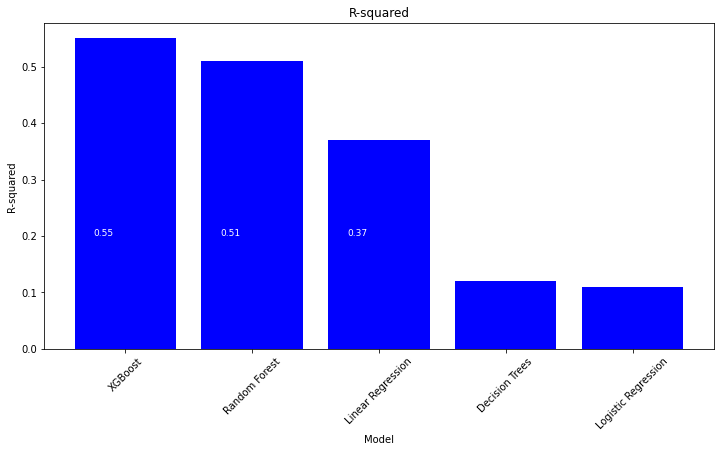

In [44]:
model_comparison(model_metrics, sort_by = 'R-squared', metric = 'R-squared')

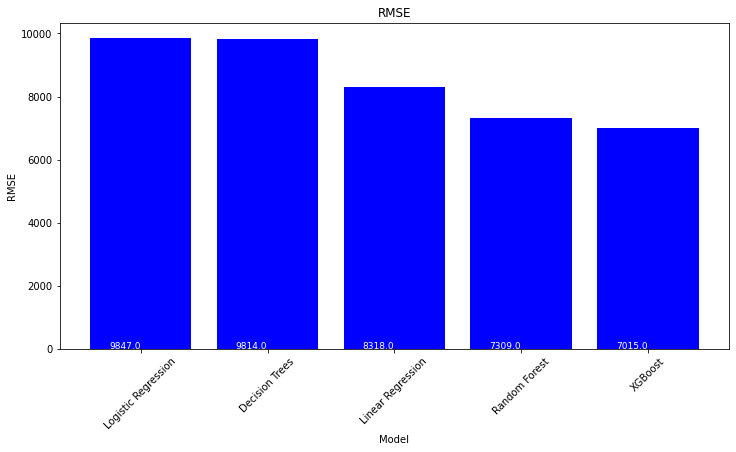

In [45]:
model_comparison(model_metrics, sort_by = 'RMSE', metric = 'RMSE')

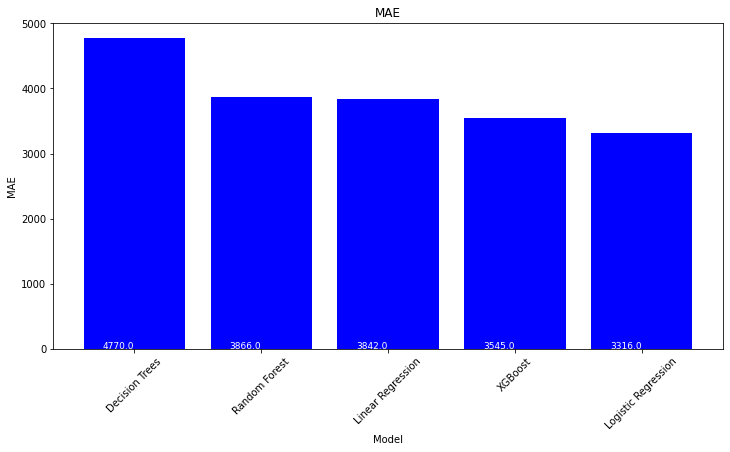

In [46]:
model_comparison(model_metrics, sort_by = 'MAE', metric = 'MAE')

## Based on the above graphs XGBoost is the best model for our use case

## Using GridSearchCV to find the best parameters for the model

In [47]:
xgbr_cv= GridSearchCV(XGBRegressor(),param_grid=[{'nthread':[4],
                                                  'learning_rate': [.03, 0.05, .07], 
                                                  'max_depth': [5, 6, 7],
                                                  'subsample': [0.7],
                                                  'colsample_bytree': [0.7],
                                                  'n_estimators': [500]}],
                                                   cv = 2,
                                                   n_jobs = 5,
                                                   verbose=True)

In [48]:
xgbr_cv.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:  2.7min finished


[13:39:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=5,
             param_grid=[{'colsample_bytree': [0.7],
                          'learning_rate': [0.03, 0.05, 0.07],
         

In [49]:
xgbr_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 5,
 'n_estimators': 500,
 'nthread': 4,
 'subsample': 0.7}

In [50]:
xgbr = XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.03, max_depth= 5, n_estimators= 500,
                        nthread= 4, subsample= 0.7)
xgbr.fit(X_train, y_train)
model_metrics["XG Boost Regression"] = model_scores(xgbr)

[13:48:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R-Sq of train data: 0.9572
RMSE of train data: 2214.7905839131145
MAE  of train data: 1250.6756663364995
************************************************************
R-Sq of test data: 0.5234
RMSE of test data: 7208.088737761334
MAE of test data: 3737.3316976261267


# XGBoost is the chosen model for our predictions